In [114]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/HRM/Traffic_Collisions_5599987132563638107.csv')

# Display the first few rows of the dataset
print(df.head())


   OBJECTID  COLLISION_SK  Case File Number Accident Date and Time  \
0         1         93687            149219       10/30/2024 18:06   
1         2         93743            152323       10/30/2024 17:45   
2         3         94033            152855       10/30/2024 14:30   
3         4         93736            151988       10/30/2024 18:50   
4         5         93765            149292       10/30/2024 20:48   

   Latitude WGS84  Longitude WGS84     Road Location  \
0       44.631314       -63.632546    401 OSBORNE ST   
1       44.612572       -63.617635   HERRING COVE RD   
2       44.661045       -63.608487       COLUMBUS ST   
3       44.653172       -63.583508  2221 MAITLAND ST   
4       44.684078       -63.674901       PARKLAND DR   

  Intersecting Road Location                       Road Configuration  \
0                        NaN  Intersection - two or more public roads   
1                 DENTITH RD  Intersection - two or more public roads   
2                   KEM

# Step 1: Data Preprocessing

In [115]:
# Convert 'Accident Date and Time' to datetime format
df['Accident Date and Time'] = pd.to_datetime(df['Accident Date and Time'])

# Drop rows with missing values in "Accident Date and Time"
df.dropna(subset=['Accident Date and Time'], inplace=True)

# Extract year, month, day, and hour (as integers) for further analysis
df['Year'] = df['Accident Date and Time'].dt.year.astype(int)
df['Month'] = df['Accident Date and Time'].dt.month.astype(int)
df['Day'] = df['Accident Date and Time'].dt.day.astype(int)
df['Hour'] = df['Accident Date and Time'].dt.hour.astype(int)

In [116]:
# Convert Non-Fatal and Fatal Injuries to binary Y/N
df['Non Fatal Injury'] = df['Non Fatal Injury'].fillna('N')
df['Fatal Injury'] = df['Fatal Injury'].fillna('N')
df['Non Fatal Injury'] = df['Non Fatal Injury'].replace({'Yes': 'Y', ' ': 'N'})
df['Fatal Injury'] = df['Fatal Injury'].replace({'Yes': 'Y', ' ': 'N'})

In [117]:
# Create a new column for collision severity
df['Collision Severity'] = np.where(df['Fatal Injury'] == 'Y', 'Fatal',
                             np.where(df['Non Fatal Injury'] == 'Y', 'Non-Fatal', 'No Injury'))

In [118]:
# Create a new column for Time of Day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

In [119]:
# Drop unnecessary columns
df.drop(columns=['x', 'y', 'Case File Number'], inplace=True)

# Step 2: Exploratory Data Analysis (EDA)

In [120]:
# Descriptive Statistics
print("Descriptive Statistics for Key Variables:")
print(df[['Non Fatal Injury', 'Fatal Injury']].describe())

Descriptive Statistics for Key Variables:
       Non Fatal Injury Fatal Injury
count             36822        36822
unique                2            2
top                   N            N
freq              31763        36742


In [121]:
# Count and summarize the severity of collisions
severity_counts = df['Collision Severity'].value_counts()
print("\nCollision Severity Distribution:")
print(severity_counts)


Collision Severity Distribution:
Collision Severity
No Injury    31683
Non-Fatal     5059
Fatal           80
Name: count, dtype: int64


Trend Analysis

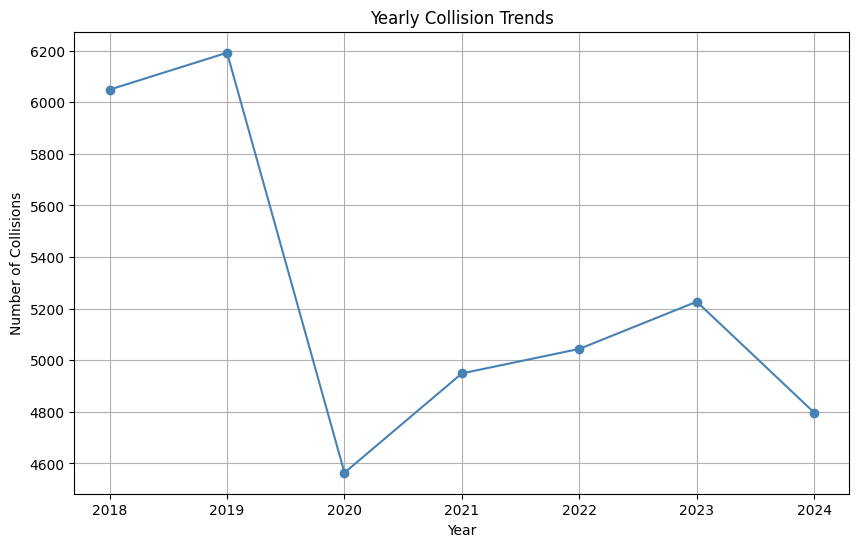

In [122]:
# Yearly collision trends
yearly_trend = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='line', marker='o', color='steelblue')
plt.title('Yearly Collision Trends')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid()
plt.show()

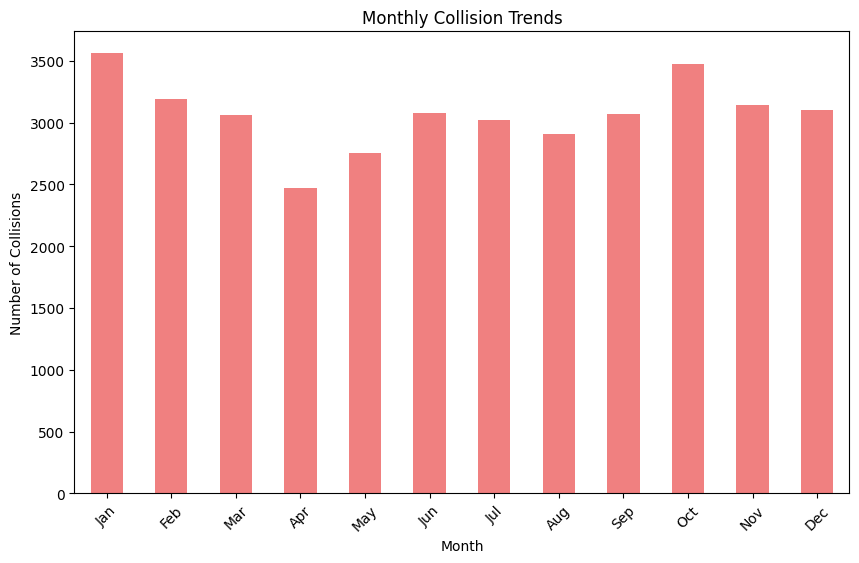

In [123]:
# Monthly collision trends
monthly_trend = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='bar', color='lightcoral')
plt.title('Monthly Collision Trends')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


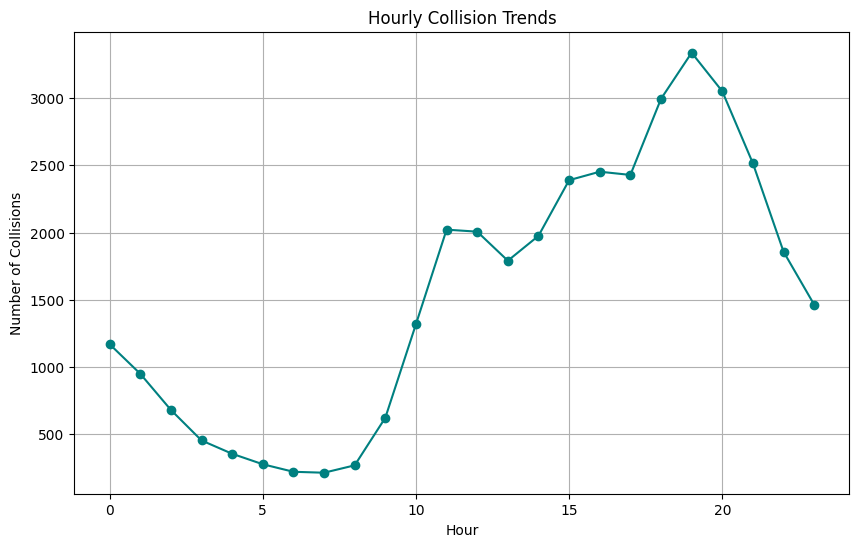

In [124]:
# Hourly collision trends
hourly_trend = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_trend.plot(kind='line', marker='o', color='teal')
plt.title('Hourly Collision Trends')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.grid()
plt.show()

Categorical Analysis

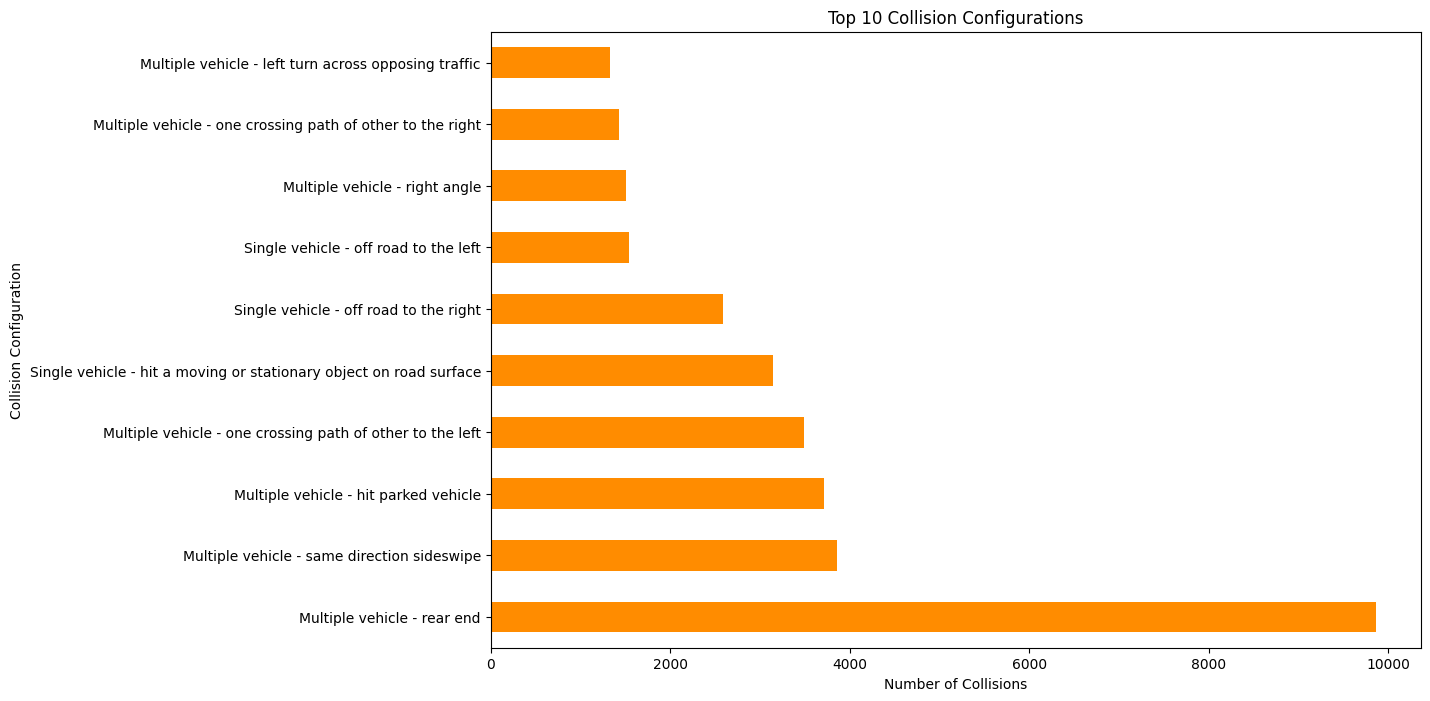

In [125]:
# Collision Configuration
collision_types = df['Collision Configuration'].value_counts()

plt.figure(figsize=(12, 8))
collision_types.head(10).plot(kind='barh', color='darkorange')
plt.title('Top 10 Collision Configurations')
plt.xlabel('Number of Collisions')
plt.ylabel('Collision Configuration')
plt.xticks(rotation=0)
plt.show()

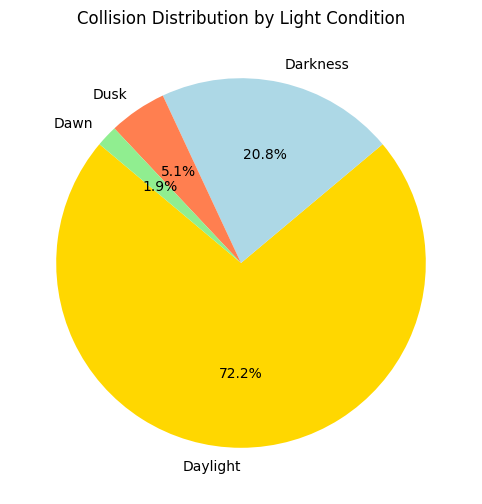

In [126]:
# Light Conditions
light_conditions = df['Light Condition'].value_counts()

plt.figure(figsize=(8, 6))
light_conditions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'coral', 'lightgreen'])
plt.title('Collision Distribution by Light Condition')
plt.ylabel('')
plt.show()

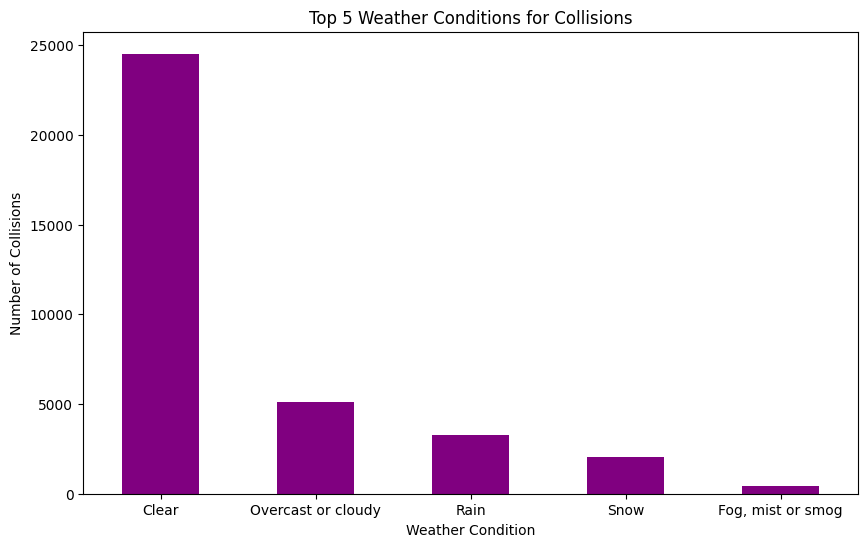

In [127]:
# Weather Conditions
weather_conditions = df['Weather Condition'].value_counts().head(5)

plt.figure(figsize=(10, 6))
weather_conditions.plot(kind='bar', color='purple')
plt.title('Top 5 Weather Conditions for Collisions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=0)
plt.show()

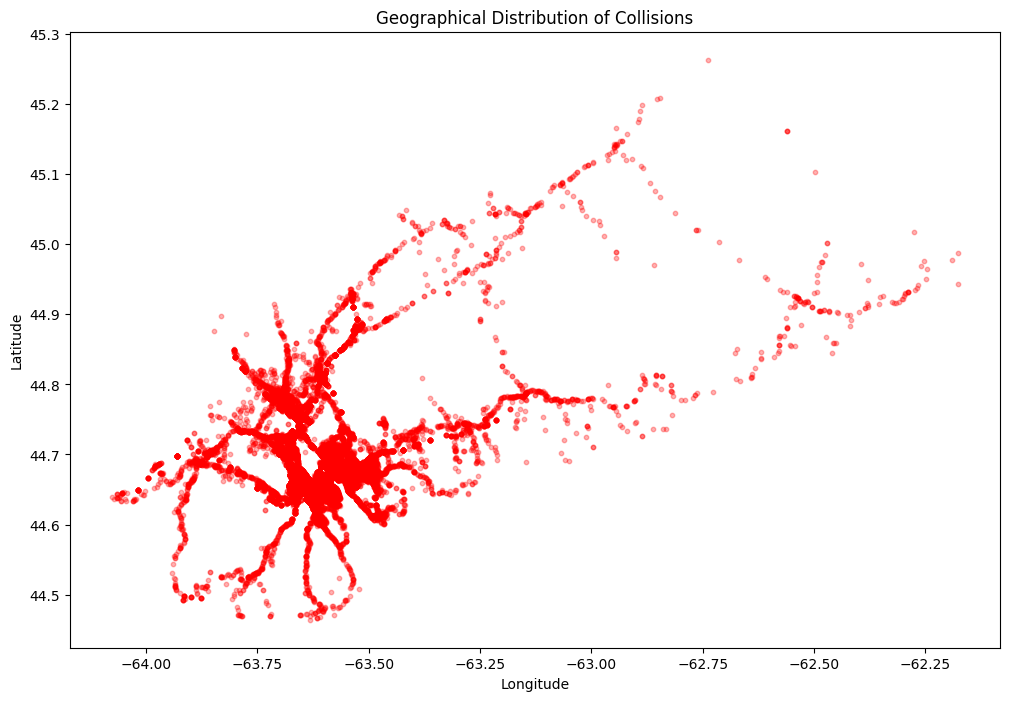

In [128]:
# Geospatial Analysis
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude WGS84'], df['Latitude WGS84'], alpha=0.3, s=10, c='red')
plt.title('Geographical Distribution of Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 3: Export Processed Data for Tableau

In [129]:
# Save the processed data for use in Tableau
df.to_csv('/content/drive/MyDrive/HRM/Processed_Traffic_Collision.csv', index=False)

In [130]:
# Summary output to confirm processing
print(f"Processed dataset saved successfully with {len(df)} rows and {len(df.columns)} columns.")

Processed dataset saved successfully with 36822 rows and 34 columns.
